KMeans_Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Importing the dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()
x = df.iloc[:,[3,4]].values


Using Elbow Method to find the optimal number of clusters with diffrenet optimization applied to the initial visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

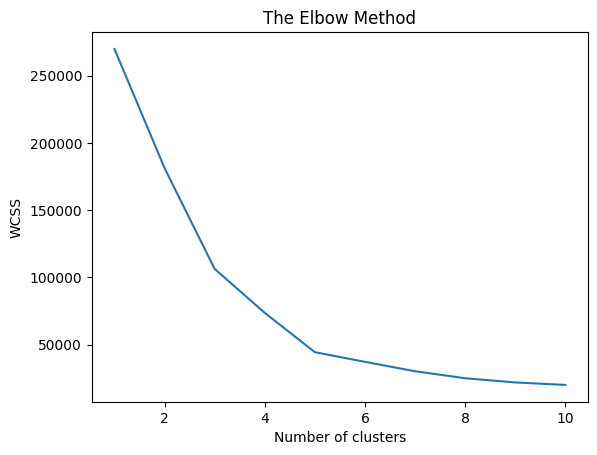

In [ ]:
wcss = [] # initialize a list to store the wcss values
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42) # call the KMeans class
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) # append the inertia_ value to the wcss list
plt.plot(range(1,11),wcss) # plot the wcss values against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

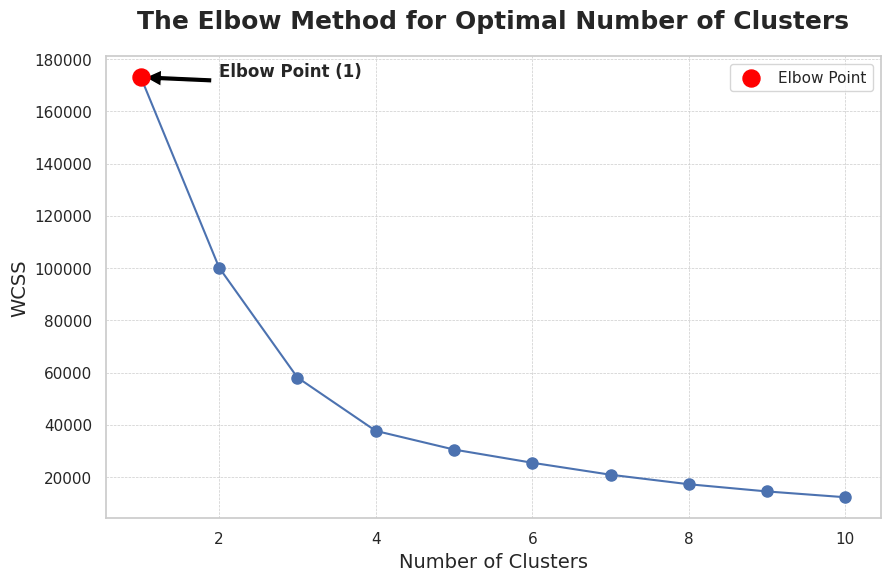

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values with enhanced visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8)

# Highlight the elbow point
elbow_point = np.argmin(np.gradient(wcss)) + 1
plt.scatter(elbow_point, wcss[elbow_point - 1], s=150, c='red', label='Elbow Point', zorder=5)
plt.annotate(f'Elbow Point ({elbow_point})', xy=(elbow_point, wcss[elbow_point - 1]),
             xytext=(elbow_point + 1, wcss[elbow_point - 1] + 200),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, weight='bold')

# Title and labels with increased size and weight
plt.title('The Elbow Method for Optimal Number of Clusters', fontsize=18, weight='bold', pad=20)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import numpy as np



# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Determine the elbow point
elbow_point = np.argmin(np.gradient(wcss)) + 1

# Create the interactive plot with Plotly
fig = go.Figure()

# Add WCSS line plot
fig.add_trace(go.Scatter(
    x=list(range(1, 11)), y=wcss,
    mode='lines+markers',
    name='WCSS',
    marker=dict(size=10, color='royalblue', symbol='circle'),
    line=dict(color='royalblue', width=3),
    hoverinfo='text',
    text=[f'Number of Clusters: {i}<br>WCSS: {wcss[i-1]:.2f}' for i in range(1, 11)]
))

# Highlight the elbow point
fig.add_trace(go.Scatter(
    x=[elbow_point], y=[wcss[elbow_point - 1]],
    mode='markers+text',
    name='Elbow Point',
    marker=dict(color='red', size=15, symbol='x'),
    text=[f'Elbow Point ({elbow_point})'],
    textposition='top center',
    hoverinfo='text',
    textfont=dict(size=16, color='black')
))

# Update layout for better aesthetics
fig.update_layout(
    title='The Elbow Method for Optimal Number of Clusters',
    title_font=dict(size=24, color='darkblue'),
    xaxis_title='Number of Clusters',
    yaxis_title='WCSS',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1, gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey'),
    plot_bgcolor='white',
    paper_bgcolor='lightgrey',
    font=dict(size=14, color='black'),
    legend=dict(
        x=0.9, y=0.9,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='black',
        borderwidth=1
    ),
    margin=dict(l=40, r=40, t=60, b=40)
)

# Add background gradient
fig.update_layout(
    shapes=[dict(
        type='rect',
        x0=0, y0=0, x1=1, y1=1,
        xref='paper', yref='paper',
        fillcolor='rgba(173, 216, 230, 0.1)',
        layer='below',
    )]
)

# Show the interactive plot
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

Training the K-Means on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualising the clusters with different type of optimization applied to the initial visualization

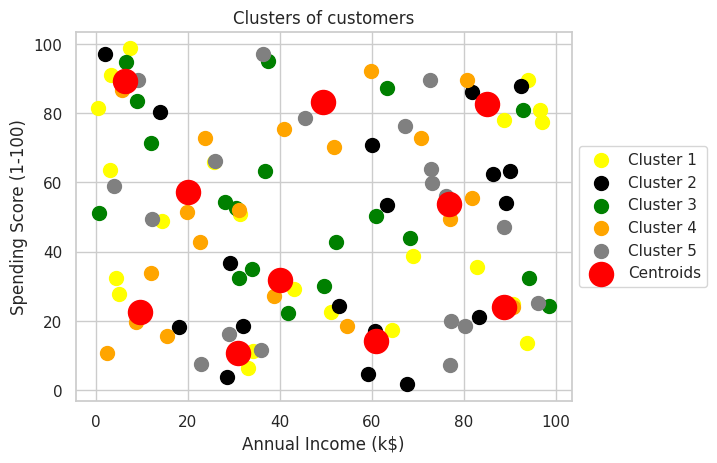

In [ ]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100,c = 'yellow',label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 100,c = 'black',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100,c = 'green',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s = 100,c = 'orange',label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s = 100,c = 'gray',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c = 'red',label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

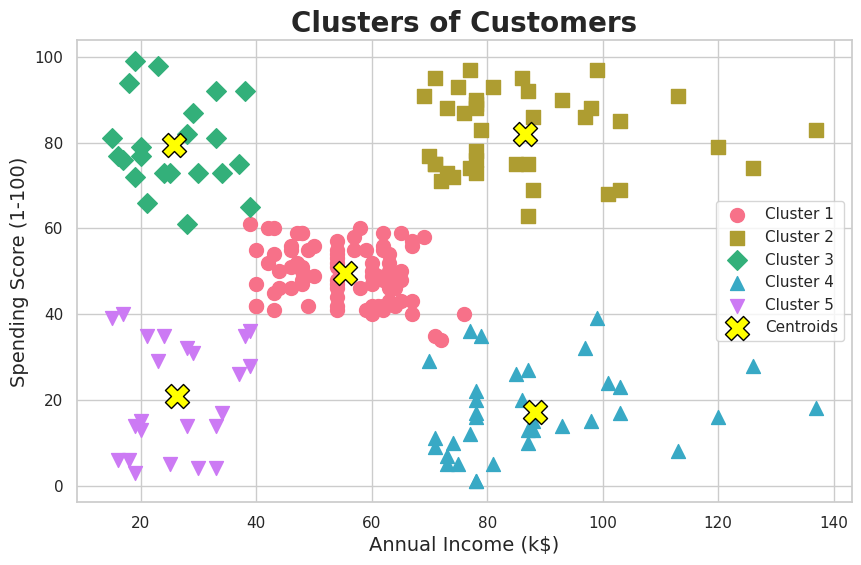

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with improved colors and markers
colors = sns.color_palette("husl", 5)  # 5 different colors from seaborn
markers = ['o', 's', 'D', '^', 'v']

for i in range(5):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1],
                s=100, c=[colors[i]], marker=markers[i], label=f'Cluster {i + 1}')

# Plot the centroids with a distinct marker and color
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', edgecolor='black', marker='X', label='Centroids')

# Title and labels with increased size and weight
plt.title('Clusters of Customers', fontsize=20, weight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Show legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


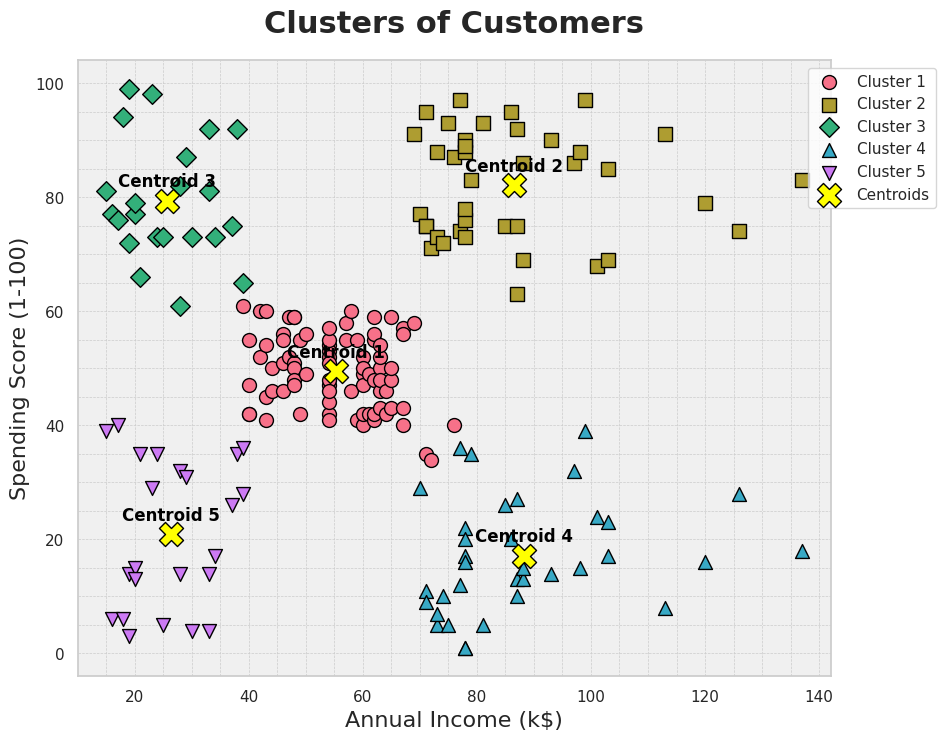

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot each cluster with improved colors and markers
colors = sns.color_palette("husl", 5)  # 5 different colors from seaborn
markers = ['o', 's', 'D', '^', 'v']

for i in range(5):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1],
                s=100, c=[colors[i]], marker=markers[i], label=f'Cluster {i + 1}', edgecolor='black')

# Plot the centroids with a distinct marker and color
centroid_scatter = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                               s=300, c='yellow', edgecolor='black', marker='X', label='Centroids')

# Annotate centroids
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Centroid {i + 1}', (centroid[0], centroid[1]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black', weight='bold')

# Title and labels with increased size and weight
plt.title('Clusters of Customers', fontsize=22, weight='bold', pad=20)
plt.xlabel('Annual Income (k$)', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)

# Set axis limits and aspect ratio
plt.xlim(min(x[:, 0]) - 5, max(x[:, 0]) + 5)
plt.ylim(min(x[:, 1]) - 5, max(x[:, 1]) + 5)
plt.gca().set_aspect('equal', adjustable='box')

# Show custom legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Enhanced grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Add a subtle background color
plt.gca().set_facecolor('#f0f0f0')

# Display the plot
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Generate synthetic data for demonstration (Replace this with your actual data)
np.random.seed(0)
x = np.random.rand(100, 2) * 100
y_kmeans = np.random.randint(0, 5, 100)
kmeans_centers = np.random.rand(5, 2) * 100

# Create a DataFrame for easy manipulation with Plotly
import pandas as pd
df = pd.DataFrame(x, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df['Cluster'] = y_kmeans

# Define cluster colors
cluster_colors = ['red', 'black', 'green', 'orange', 'gray']

# Create the scatter plot with Plotly
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',
                 color='Cluster',
                 color_discrete_sequence=cluster_colors,
                 symbol='Cluster',
                 title='Clusters of Customers',
                 template='plotly_white')

# Add centroids to the plot
for i, centroid in enumerate(kmeans_centers):
    fig.add_trace(go.Scatter(
        x=[centroid[0]], y=[centroid[1]],
        mode='markers+text',
        marker=dict(color='yellow', size=15, symbol='x', line=dict(color='black', width=2)),
        text=[f'Centroid {i+1}'],
        textposition='top center',
        name=f'Centroid {i+1}'
    ))

# Update layout for better aesthetics
fig.update_layout(
    title_font_size=22,
    xaxis_title='Annual Income (k$)',
    yaxis_title='Spending Score (1-100)',
    legend_title='Clusters',
    legend=dict(x=1.05, y=1),
    margin=dict(l=0, r=0, t=40, b=0)
)

# Add background gradient
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    shapes=[dict(
        type='rect',
        x0=0, y0=0, x1=1, y1=1,
        xref='paper', yref='paper',
        fillcolor='rgba(240, 240, 240, 0.6)',
        layer='below',
    )]
)

fig.show()
